In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
#import imutils

import qrcode

from pyzbar.pyzbar import decode #visual c 설치해야한다.
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

(118.80000305175781, 104.4000015258789)
[103 225 232  94 204  29 236 237  90 227 113 222  88 232 222 184 223 203
 178  31 215 102 254  66  62  15  85 125 221 250 218 148]
(416.4000244140625, 187.20001220703125)
[ 17 175  43   3 148 173 232 199 108  25 107  83 146  56  84  96 233 171
  74 157 158 184  85  96 253   8  26  64 193  74 161 142]
desc1.shape (426, 32)
desc2.shape (500, 32)


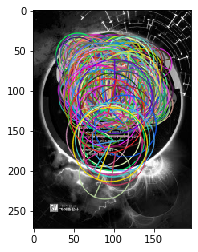

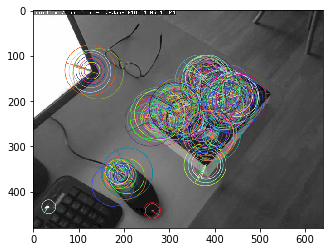

In [5]:
src1 = cv2.imread('./data/book3.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./data/book3_1.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None) #위치정보를 갖음
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print(keypoints1[171].pt) # 171번 째 점의 위치를 가지고 있음
print(desc1[171]) #171번 째 8비트, 디스크립션, 32개의 값을 가지고있음

print(keypoints2[171].pt) # 171번 째 점의 위치를 가지고 있음
print(desc2[171]) #171번 째 8비트, 디스크립션, 32개의 값을 가지고있음

print('desc1.shape', desc1.shape) #desc1.shape (453, 32) , 포인터 갯수, 포인터 하나당 32바이트
print('desc2.shape', desc2.shape) #desc2.shape (500, 32)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1,-1,-1), # 모두 칠하라
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1,-1,-1), # 모두 칠하라
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


#이미지 크기가 서로 다르면 붙일 수 없음
imshow('',dst1) 
imshow('',dst2) 

In [6]:
#거리를 재는 해밍 디스턴스 라고 있음, 거리재는 방법임, 고속으로 재는방법
# 비트로 비교해서 같으면 0 다르면 1, 7과 4의 거리를 재면(서로뻄) 비트로 표시하면 100(2진수) 인데 0을 빼면 1이 남게된다 즉 거리는 1로 표기한다. 
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING) 
matches = matcher.match(desc1,desc2)# 매칭되는 점을 표시

print(len(matches)) #매칭되는 점의 갯수
#print(matches) #2개의 디스크립션을 비교후 최소값으로 지정됨(1:1로 매핑)

# print(matches[0]) #첫번째에 매칭되는 주소를 담고있는 클래스
# print(matches[0].queryIdx) # 첫번째 매칭
# print(matches[0].trainIdx) # 매칭놈의 주소
# print(matches[0].distance) # 값이 0이 나와야 이상점

# for n in matches :
#     print(f'쿼리인덱스: {n.queryIdx - n.trainIdx  / n.distance }')

# 첫번쨰 같은 점, 계산상의 거리로는 서로 일치한다?
print(keypoints1[matches[0].queryIdx].pt)# 첫번째 이미지의 매칭포인트 점, 실제 물리적인 좌표
print(keypoints2[matches[0].queryIdx].pt)

426
(70.0, 57.0)
(384.0, 183.0)


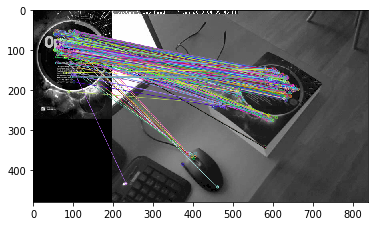

True

In [8]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2 , matches, None)
imshow('', dst)
cv2.imwrite('book3_orb.png',dst)

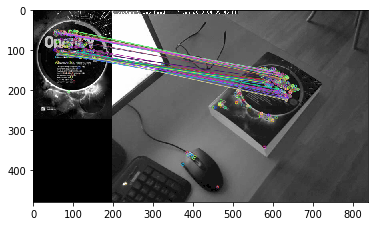

True

In [13]:
# 점들을 정렬시켜 나타내기
matches = sorted(matches, key=lambda x: x.distance) #거리로 정렬
#print(matches)
good_matches = matches[:50] #20개의 점만 나오도록 함

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2 , good_matches, None)

imshow('',dst2)
cv2.imwrite('book3_orb2.png',dst2)